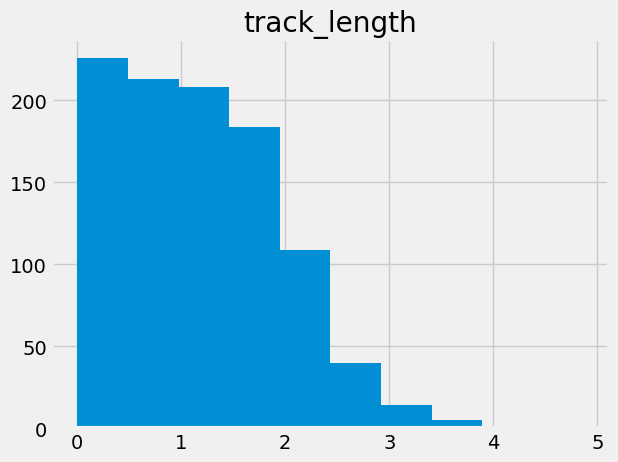

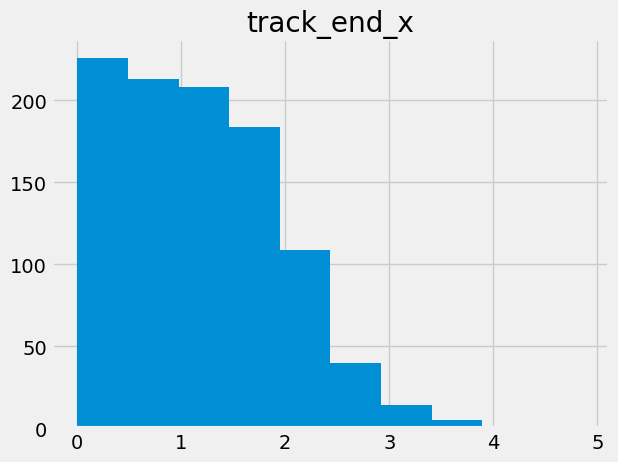

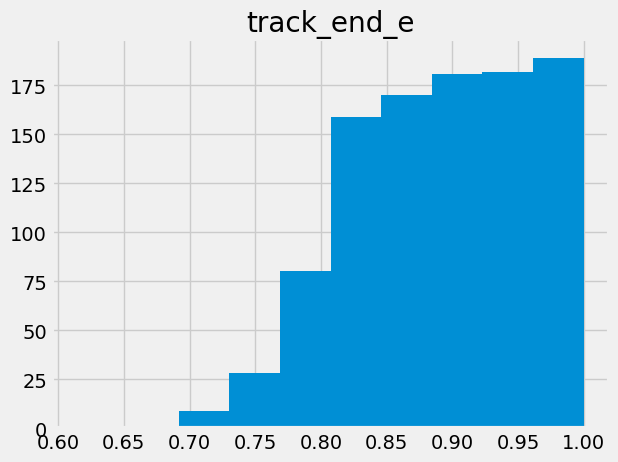

In [77]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

class track:
    def __init__(self) -> None:
        self.track_length = abs(float(np.random.normal(1)))
        self.trajectory_x = np.linspace(0, self.track_length, 10).flatten() # position of trajectory point
        self.trajectory_e = np.exp(-self.trajectory_x/10).flatten() # energy of particle at each trajectory point
        self.interaction = np.random.choice([0, 1])


tracks = [track() for i in range(1000)]

data = {}
data["track_length"] = []
data["track_end_x"] = []
data["track_end_e"] = []
for t in tracks:
    data["track_length"].append(t.track_length)
    data["track_end_x"].append(t.trajectory_x[-1])
    data["track_end_e"].append(t.trajectory_e[-1])


for k, v in data.items():
    plt.figure()
    plt.hist(v)
    plt.title(k)

(array([583., 224., 126.,  42.,  15.,   6.,   3.,   0.,   0.,   1.]),
 array([1.53306657e-08, 1.84709915e-02, 3.69419677e-02, 5.54129439e-02,
        7.38839200e-02, 9.23548962e-02, 1.10825872e-01, 1.29296849e-01,
        1.47767825e-01, 1.66238801e-01, 1.84709777e-01]),
 <BarContainer object of 10 artists>)

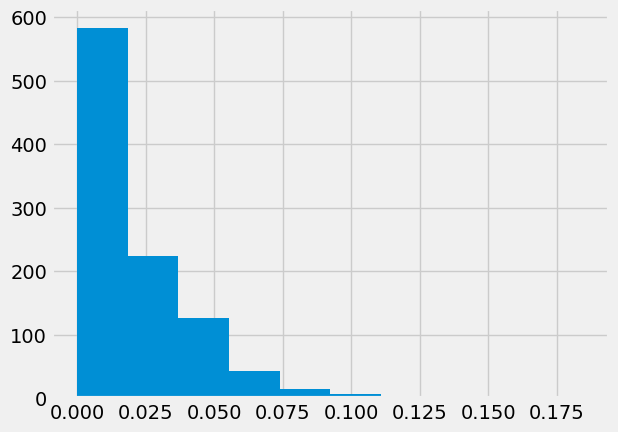

In [78]:
x_slice = 0.1 # granulaity of the wires

for t in tracks:
    dx = t.trajectory_x[1:] - t.trajectory_x[:-1]
    de = -(t.trajectory_e[1:] - t.trajectory_e[:-1])
    t.e_slice = de * dx / x_slice # de is the difference in energy between trajectory points, dx is difference in x between trajectory points

    t.interacting_energy = t.e_slice[-1] # not really correct, this needs to be recalculated based on the energy slices and the initial kinetic energy (I think)

plt.hist([t.interacting_energy for t in tracks])

In [79]:
# fill bins

# interacting is if the process is inelastic and has the charger exchang topology, we'll call this 1
# incident is all pi+ beam particles, assume for now we always produce a pi+ beam particle

n_incident = []
n_interacting = []
for t in tracks:
    n_incident.append(t.interacting_energy)
    if t.interaction == 1 : n_interacting.append(t.interacting_energy)

print(len(n_incident))
print(len(n_interacting))

1000
500


(array([207.,  90.,  70.,  52.,  36.,  18.,  13.,   5.,   5.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
 <BarContainer object of 9 artists>)

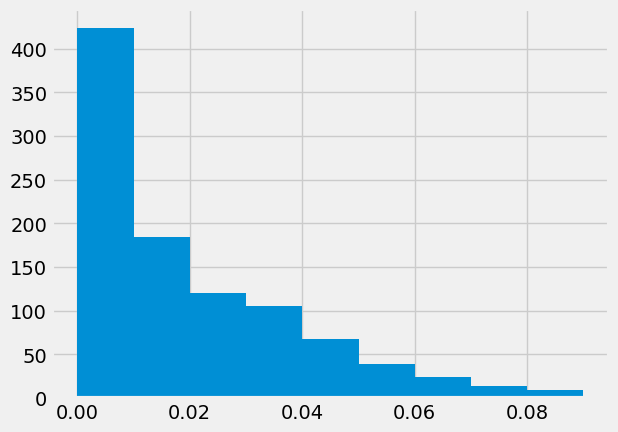

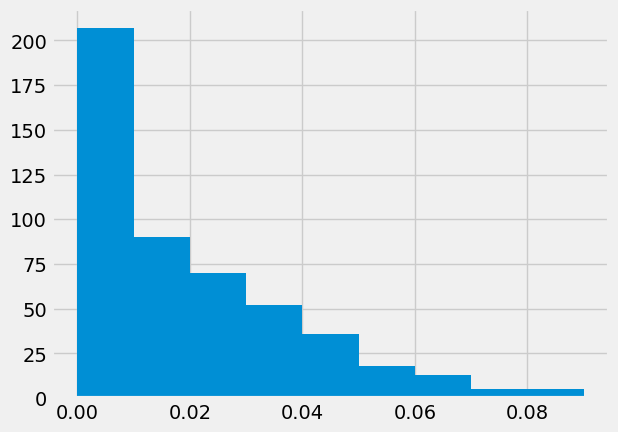

In [80]:
# bin data
bins = np.arange(0, 0.1, 0.01)

n_inc = np.histogram(n_incident, bins)
n_int = np.histogram(n_interacting, bins)

plt.hist(n_incident, bins, range=[0, 0.1])
plt.figure()
plt.hist(n_interacting, bins, range=[0, 0.1])

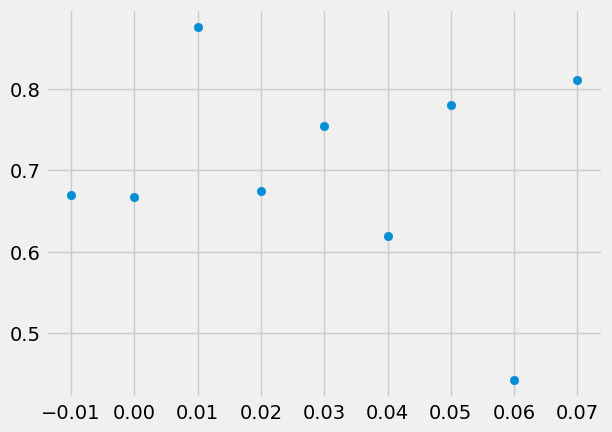

In [81]:
xs = np.log(n_inc[0]/(n_inc[0] - n_int[0]))
xs = np.nan_to_num(xs, 0)

edges = n_inc[1][:-1] - (n_inc[1][1:] - n_inc[1][:-1]) # plot xs points at the center of the energy bins

plt.scatter(x = edges, y = xs, linestyle = "-")